In [2]:
import pysam
from Bio import SeqIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

## TEST

**bwa index MG1655-K12.first10K.fasta**

**bwa mem MG1655-K12.first10K.fasta test_1.fastq test_2.fastq > alignment.sam**

**samtools view -S -b alignment.sam > alignment.bam**

56320 + 0 mapped (100.00% : N/A)


## Dataset 1

**bwa index ref.fasta**

**bwa mem ref.fasta frag.R1.fastq frag.R2.fastq > alignment.sam**

**samtools flagstat alignment.sam**

3424657 + 0 mapped (99.77% : N/A)

**samtools view -S -b alignment.sam > alignment.bam**

**samtools sort alignment.bam -o alignment_sorted.bam**

**samtools index alignment_sorted.bam**

**samtools view alignment_sorted.sam | awk '$9>0' | cut -f 2 > inserts.txt**


**samtools view -f66 alignment_sorted.bam  | cut -f9 | awk '{print sqrt($0^2)}' > insert-sizes.txt**

In [112]:
Ref_path = '/media/data/NGS_2/dataset_1/ref.fasta'

In [115]:
bam_path = '/media/data/NGS_2/dataset_1/alignment_sorted.bam' 

In [90]:
inserts_path = '/media/data/NGS_2/dataset_1/insert-sizes.txt'

In [126]:
samfile = pysam.AlignmentFile(bam_path, 'rb')
genome = next(SeqIO.parse(Ref_path, 'fasta')).seq

In [91]:
inserts = []
with open(inserts_path, 'r') as input_file:
    for line in input_file:
        if line[0].isdigit():
            inserts.append(int(line[:line.find('\n')]))
            
inserts = np.asarray(inserts)

In [109]:
insert_count = Counter(inserts)
inserts_good = []
for ins_size in inserts:
    if insert_count[ins_size] > 10:
        inserts_good.append(ins_size)

In [110]:
mean = np.mean(inserts_good)
std = np.std(inserts_good)
quantile = np.quantile(inserts_good, [0.05, 0.975])

mean, std, quantile

(269.4202406507043, 63.99606692840991, array([183., 420.]))

<function matplotlib.pyplot.show(close=None, block=None)>

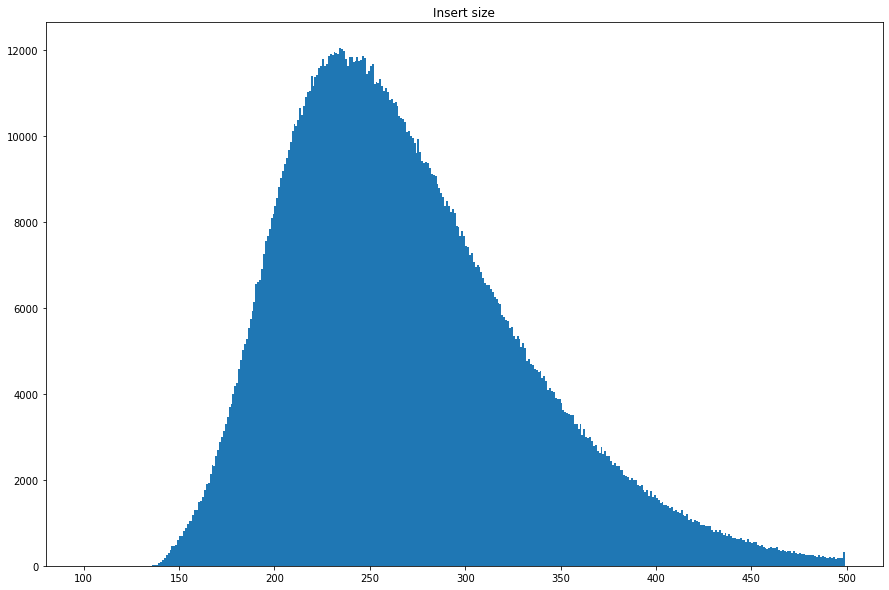

In [111]:
plt.figure(figsize=(15, 10))
plt.hist(inserts, range(100, 500))
plt.title('Insert size')
plt.show

## Dataset 2